In [185]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from calibration import lifetime_to_temperature_201112, pict_calibration
from scipy.optimize import curve_fit
import seaborn as sns
from PIL import Image
import scipy as sp
from matplotlib.backends.backend_pdf import PdfPages

In [186]:
df_500msec = pd.read_csv('/Users/masaharu/Desktop/執筆論文/温度ダイナミクス論文/Fig4/Fig4b/Fig4b_500msec_tmp_relaxation.csv', header = None)[:35]
df_1sec = pd.read_csv('/Users/masaharu/Desktop/執筆論文/温度ダイナミクス論文/Fig4/Fig4b/Fig4b_1sec_tmp_relaxation.csv', header = None)[:35]
df_5sec = pd.read_csv('/Users/masaharu/Desktop/執筆論文/温度ダイナミクス論文/Fig4/Fig4b/Fig4b_5sec_tmp_relaxation.csv', header = None)[:75]

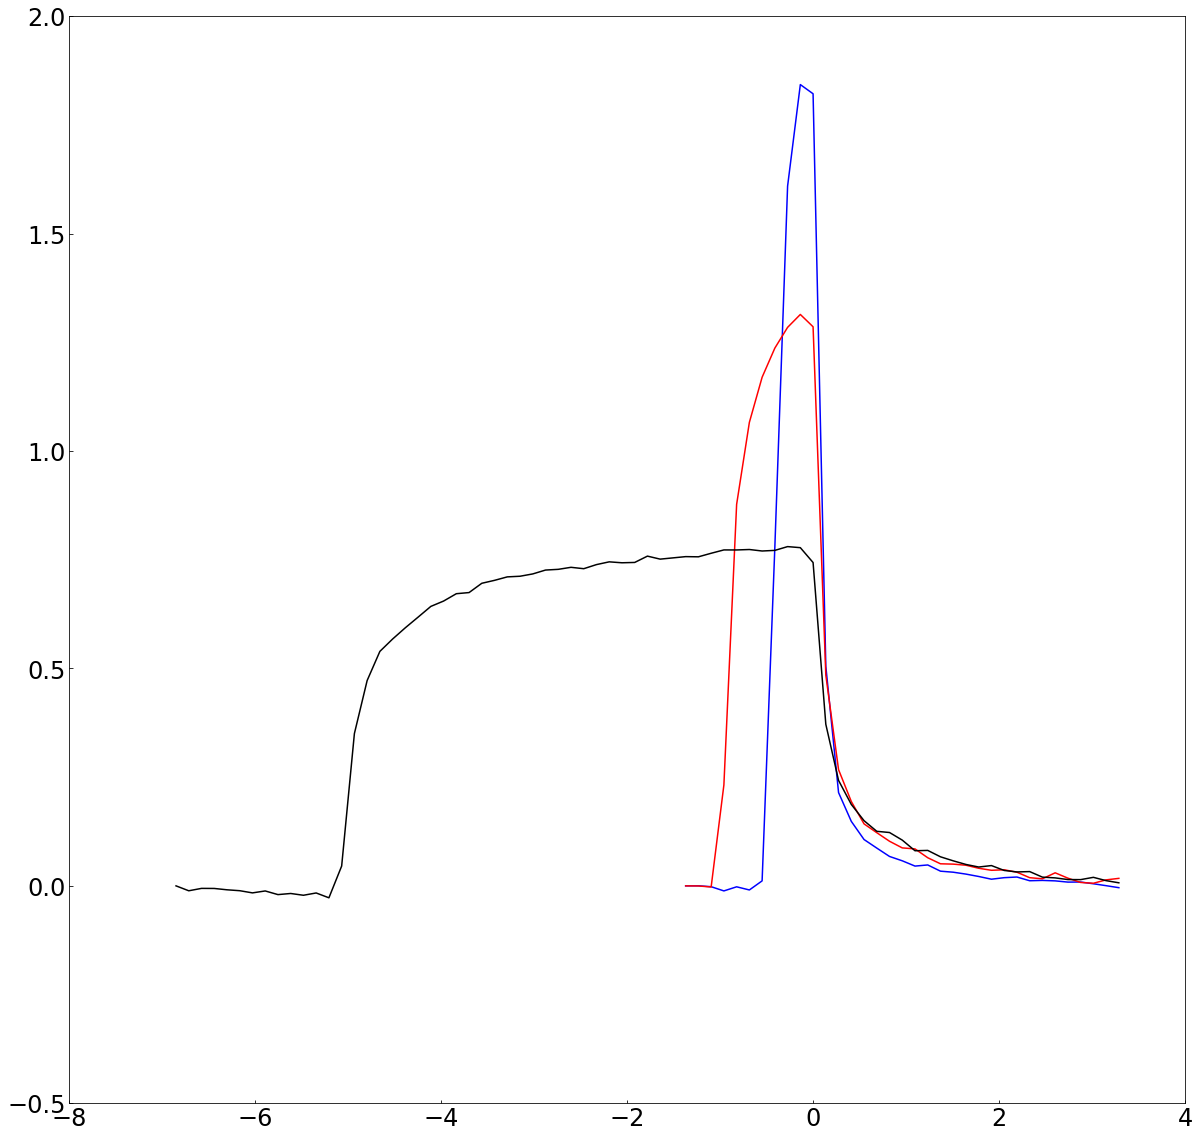

In [187]:
deltaT_500msec = df_500msec.iloc[:, 1:].mean(axis = 1)
deltaT_1sec = df_1sec.iloc[:, 1:].mean(axis = 1)
deltaT_5sec = df_5sec.iloc[:, 1:].mean(axis = 1)

time_500msec = df_500msec.iloc[:, 0]
time_1sec = df_1sec.iloc[:, 0]
time_5sec = df_5sec.iloc[:, 0]


fig = plt.figure(figsize = (20, 20))
plt.tick_params(axis='both', direction = "in", labelsize = 24)
plt.plot(time_500msec, deltaT_500msec, color = 'blue')
plt.plot(time_1sec, deltaT_1sec, color = 'red')
plt.plot(time_5sec, deltaT_5sec, color = 'black')
plt.ylim(-0.5, 2.0)
plt.xlim(-8, 4)

'''
#1˚Cを示すバーを挿入
bar_500msec = [100 - 20/deltaT_500msec[10]*i/100 for i in range(100)]
bar_500msec_pos = [3.4 for i in range(len(bar_500msec))]
plt.plot(bar_500msec_pos, bar_500msec, linewidth = 4, color = 'black', linestyle = '-')

#1˚Cを示すバーを挿入
bar_5sec = [100 - 20/deltaT_5sec[10]*i/100 for i in range(100)]
bar_5sec_pos = [3.6 for i in range(len(bar_500msec))]
plt.plot(bar_5sec_pos, bar_5sec, linewidth = 4, color = 'red', linestyle = '-')
'''

plt.show()



pp = PdfPages('/Users/masaharu/Desktop/執筆論文/温度ダイナミクス論文/Program/Uneditied_figure/Fig4b/ave_tmp.pdf')
pp.savefig(fig)
pp.close()

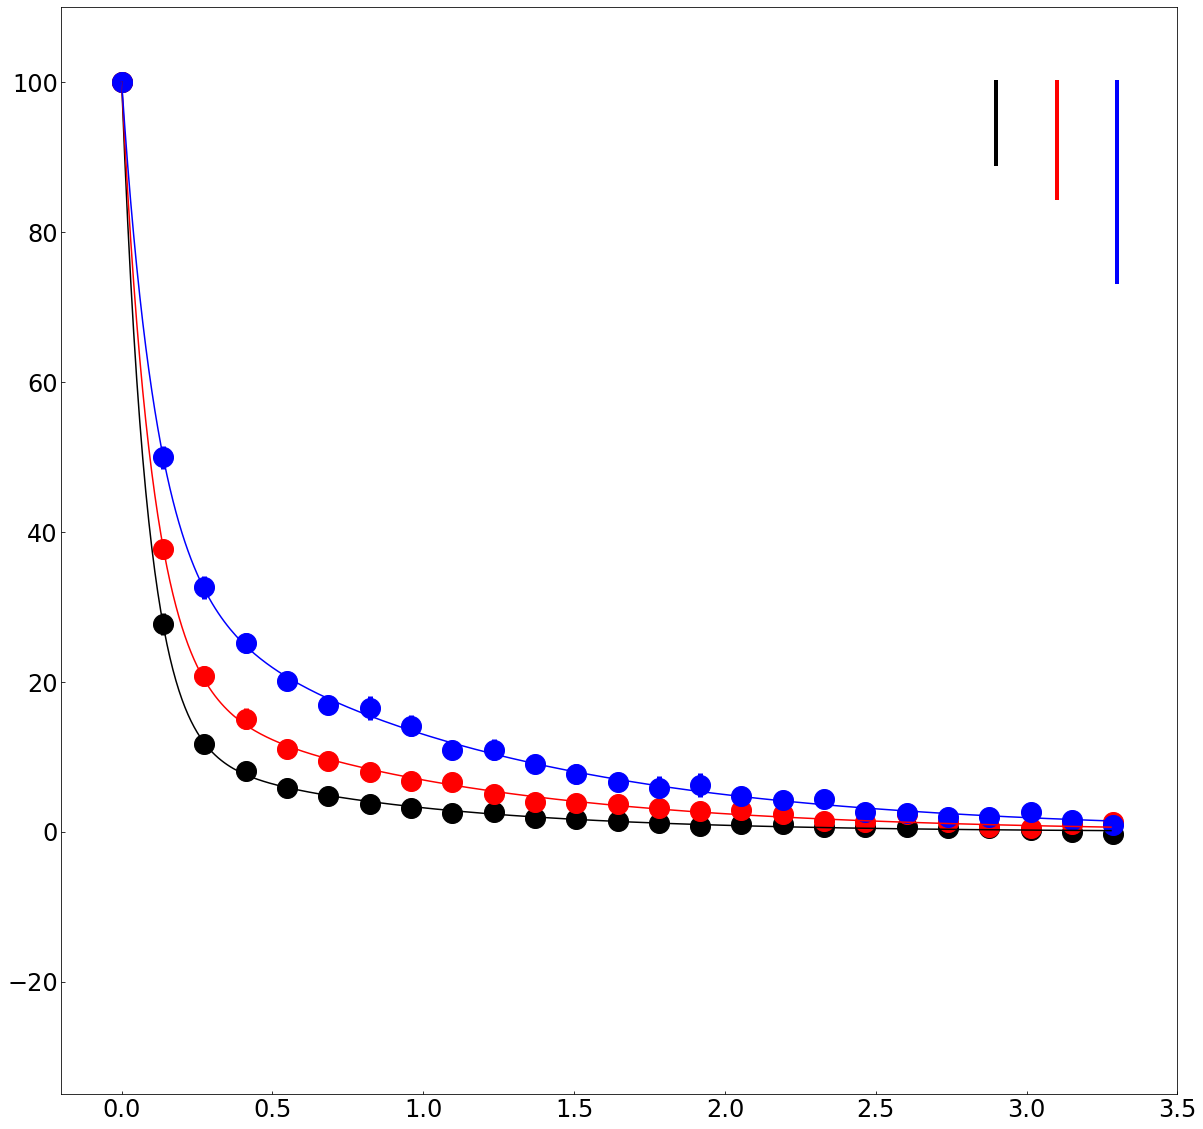

In [188]:
fig = plt.figure(figsize = (20, 20))
plt.tick_params(axis='both', direction = "in", labelsize = 24)

time_500msec = df_500msec.iloc[10:, 0]
time_1sec = df_1sec.iloc[10:, 0]
time_5sec = df_5sec.iloc[50:, 0]

norm_relaxation_500msec = deltaT_500msec[10:]/deltaT_500msec.iloc[10]
norm_relaxation_1sec = deltaT_1sec[10:]/deltaT_1sec.iloc[10]
norm_relaxation_5sec = deltaT_5sec[50:]/deltaT_5sec.iloc[50]

plt.plot(time_500msec, norm_relaxation_500msec*100, color = 'black', linewidth = 0, marker = 'o', markersize = 20)
plt.plot(time_1sec, norm_relaxation_1sec*100, color = 'red', linewidth = 0, marker = 'o', markersize = 20)
plt.plot(time_5sec, norm_relaxation_5sec*100, color = 'blue', linewidth = 0, marker = 'o', markersize = 20)

plt.ylim(-35, 110)
plt.xlim(-0.2, 3.5)


#エラーバーのプロット(500msec)
df_500msec_delta = df_500msec.iloc[:, 1:]
df_500msec_norm = df_500msec_delta/df_500msec_delta.iloc[10, :]*100
df_500msec_sem = df_500msec_norm.sem(axis = 1)
plt.errorbar(time_500msec, norm_relaxation_500msec*100, yerr = df_500msec_sem[10:], capsize=0, fmt='o', markersize=0, linewidth = 5, ecolor='black')


#エラーバーのプロット(1sec)
df_1sec_delta = df_1sec.iloc[:, 1:]
df_1sec_norm = df_1sec_delta/df_1sec_delta.iloc[10, :]*100
df_1sec_sem = df_1sec_norm.sem(axis = 1)
plt.errorbar(time_1sec, norm_relaxation_1sec*100, yerr = df_1sec_sem[10:], capsize=0, fmt='o', markersize=0, linewidth = 5, ecolor='red')


#エラーバーのプロット(5sec)
df_5sec_delta = df_5sec.iloc[:, 1:]
df_5sec_norm = df_5sec_delta/df_5sec_delta.iloc[50, :]*100
df_5sec_sem = df_5sec_norm.sem(axis = 1)
plt.errorbar(time_5sec, norm_relaxation_5sec*100, yerr = df_5sec_sem[50:], capsize=0, fmt='o', markersize=0, linewidth = 5, ecolor='blue')


#温度緩和の時定数の計算
def relaxation(time, ratio, t1, t2):
    return ratio*np.exp(-time/t1) + (1-ratio)*np.exp(-time/t2)
result_500msec = curve_fit(relaxation, time_500msec, norm_relaxation_500msec)[0]
result_1sec = curve_fit(relaxation, time_1sec, norm_relaxation_1sec)[0]
result_5sec = curve_fit(relaxation, time_5sec, norm_relaxation_5sec)[0]

time_500msec_fit = np.arange(time_500msec[10], time_500msec[34], 0.01)
time_1sec_fit = np.arange(time_1sec[10], time_1sec[34], 0.01)
time_5sec_fit = np.arange(time_5sec[50], time_5sec[74], 0.01)

plt.plot(time_500msec_fit, relaxation(np.ravel(time_500msec_fit), result_500msec[0], result_500msec[1], result_500msec[2])*100, color = 'black')
plt.plot(time_1sec_fit, relaxation(np.ravel(time_1sec_fit), result_1sec[0], result_1sec[1], result_1sec[2])*100, color = 'red')
plt.plot(time_5sec_fit, relaxation(np.ravel(time_5sec_fit), result_5sec[0], result_5sec[1], result_5sec[2])*100, color = 'blue')


#1˚Cを示すバーを挿入
bar_500msec = [100 - 20/deltaT_500msec[10]*i/100 for i in range(100)]
bar_500msec_pos = [2.9 for i in range(len(bar_500msec))]
plt.plot(bar_500msec_pos, bar_500msec, linewidth = 4, color = 'black', linestyle = '-')

bar_1sec = [100 - 20/deltaT_1sec[10]*i/100 for i in range(100)]
bar_1sec_pos = [3.1 for i in range(len(bar_1sec))]
plt.plot(bar_1sec_pos, bar_1sec, linewidth = 4, color = 'red', linestyle = '-')

bar_5sec = [100 - 20/deltaT_5sec[50]*i/100 for i in range(100)]
bar_5sec_pos = [3.3 for i in range(len(bar_5sec))]
plt.plot(bar_5sec_pos, bar_5sec, linewidth = 4, color = 'blue', linestyle = '-')


plt.show()

pp = PdfPages('/Users/masaharu/Desktop/執筆論文/温度ダイナミクス論文/Program/Uneditied_figure/Fig4b/relaxation.pdf')
pp.savefig(fig)
pp.close()

In [195]:
sum_500msec = df_500msec_norm[12:].sum(axis = 0)*0.137
sum_1sec = df_1sec_norm[12:].sum(axis = 0)*0.137
sum_5sec = df_5sec_norm[52:].sum(axis = 0)*0.137

In [196]:
sem_500msec_err = sum_500msec.std(ddof = 1)/np.sqrt(len(sum_500msec))
sem_1sec_err = sum_1sec.std(ddof = 1)/np.sqrt(len(sum_1sec))
sem_5sec_err = sum_5sec.std(ddof = 1)/np.sqrt(len(sum_5sec))

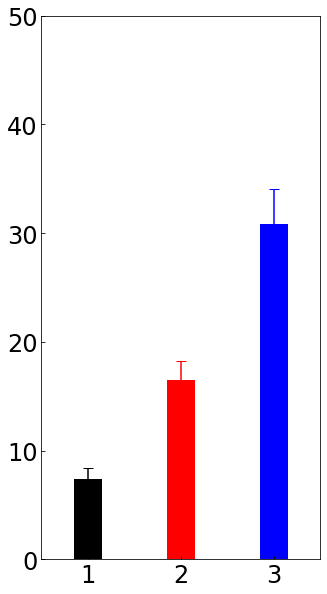

In [200]:
fig = plt.figure(figsize = (5, 10))
plt.tick_params(axis='both', direction = "in", labelsize = 24)
plt.bar(1, np.average(sum_500msec), yerr = sem_500msec_err, ecolor = 'black', capsize = 5, width=0.3, color='black')
plt.bar(2, np.average(sum_1sec), yerr = sem_1sec_err, ecolor = 'red', capsize = 5, width=0.3, color='red')
plt.bar(3, np.average(sum_5sec), yerr = sem_5sec_err, ecolor = 'blue', capsize = 5, width=0.3, color='blue')
plt.ylim(0, 50)
plt.xlim(0.5, 3.5)

#pdfのセーブ
pp = PdfPages('../Uneditied_figure/Fig4b_ralaxation_bar.pdf')
pp.savefig(fig)
pp.close()